In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def permutation_test(X, y, n_permutations=10000):
    """
    Perform a permutation test to evaluate the significance of a linear regression slope.
    
    Parameters:
    - X: array-like, shape (n_samples, 1), independent variable.
    - y: array-like, shape (n_samples,), dependent variable.
    - n_permutations: int, number of permutations.
    
    Returns:
    - observed_slope: float, the slope of the linear regression on original data.
    - permuted_slopes: array of floats, the slopes from permuted data.
    - p_value: float, the p-value from the permutation test.
    """
    # Fit linear regression on original data
    model = LinearRegression()
    model.fit(X, y)
    observed_slope = model.coef_[0]
    
    # Perform permutation test
    permuted_slopes = []
    for _ in range(n_permutations):
        permuted_X = np.random.permutation(X)
        perm_model = LinearRegression()
        perm_model.fit(permuted_X, y)
        permuted_slopes.append(perm_model.coef_[0])
    
    # Calculate p-value
    permuted_slopes = np.array(permuted_slopes)
    p_value = (np.sum(permuted_slopes >= observed_slope) + np.sum(permuted_slopes <= -observed_slope)) / n_permutations
    
    return observed_slope, permuted_slopes, p_value

# Simulate data
def run_simulation(relative_noise_level=1.0):
    np.random.seed(42)
    n_samples = 100
    X = np.random.uniform(0, 10, n_samples).reshape(-1, 1)
    true_slope = 2.5
    true_intercept = 1.0
    noise = np.random.normal(0, 2, n_samples)
    y = true_slope * X.flatten() + true_intercept + relative_noise_level*noise

    # Run permutation test
    observed_slope, permuted_slopes, p_value = permutation_test(X, y, n_permutations=1000)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.hist(permuted_slopes, bins=30, alpha=0.7, color='skyblue', edgecolor='black', label='Permutation distribution')
    plt.axvline(observed_slope, color='red', linestyle='--', linewidth=2, label=f'Observed slope = {observed_slope:.2f}')
    plt.axvline(-observed_slope, color='red', linestyle='--', linewidth=2)
    plt.title("Permutation Test: Histogram of Slopes", fontsize=16)
    plt.xlabel("Slope", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

    # Print the p-value
    print(f"P-value: {p_value:.4f}")


The noise level is pretty low so the p value will be close to zero.

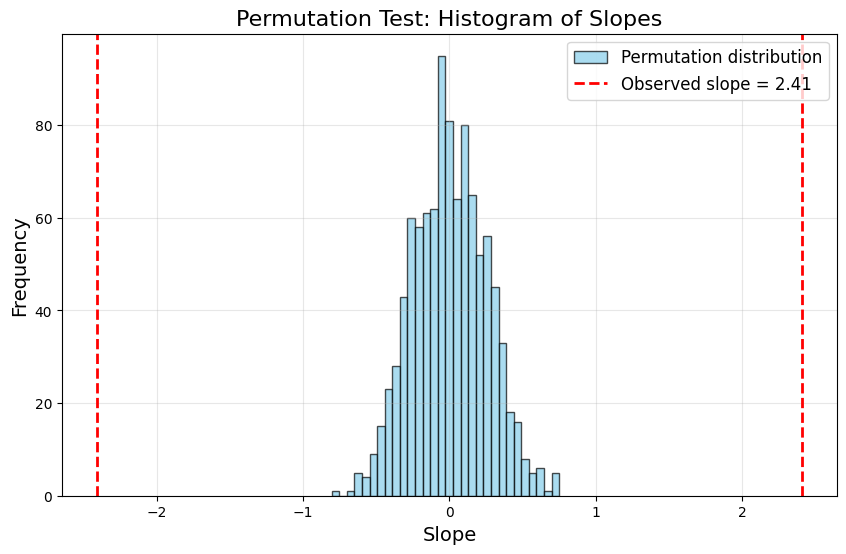

P-value: 0.0000


In [9]:
run_simulation()

Increasing the noise level the p-value increases.

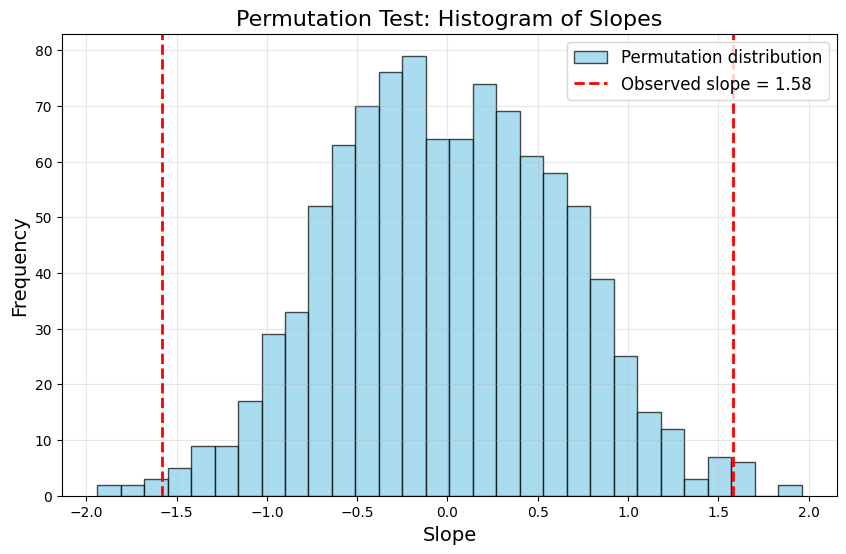

P-value: 0.0140


In [10]:
run_simulation(10.0)

With a lot of noise we find tht our model is not sufficiently different from noise (because it is noise).

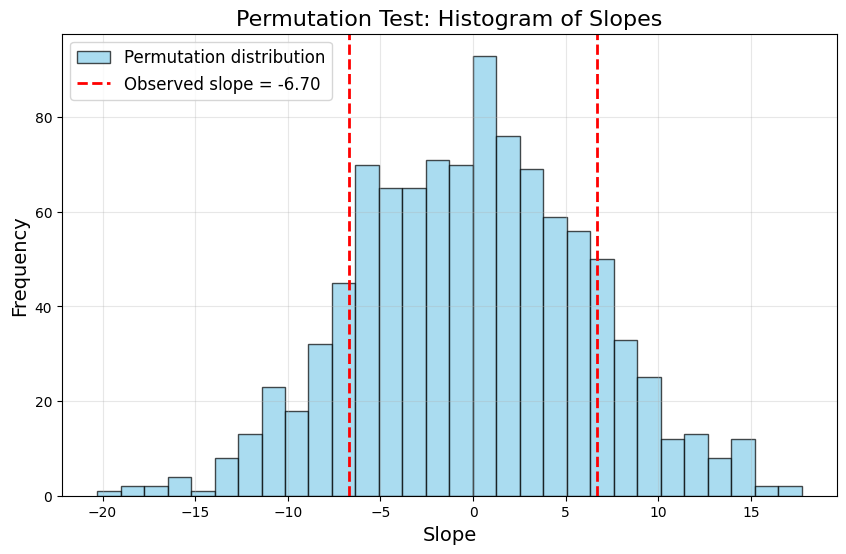

P-value: 1.7220


In [11]:
run_simulation(100.0)